In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [51]:
df_t=pd.read_csv('treatments_2017-2020.csv')

In [4]:
df_t.shape

(4049136, 82)

In [6]:
df_t['GENDER'].value_counts(normalize=True)

 1    0.659722
 2    0.339890
-9    0.000388
Name: GENDER, dtype: float64

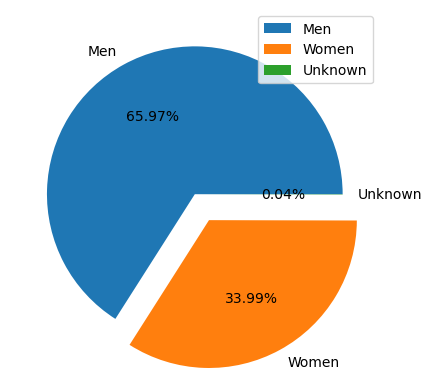

In [76]:
plt.pie(df_t['GENDER'].value_counts(normalize=True),autopct='%1.2f%%',labels=['Men','Women','Unknown'],explode=[0,0.2,0])
plt.legend(loc='upper right')
plt.savefig("final/gender.jpg",dpi=100, bbox_inches='tight')
#plt.xlabel("Gender Class")

### Among 4 Million of total population from the given dataset of statistical area, 34% are women.

In [77]:
df_p = df_t.loc[df_t['GENDER']==2]


In [78]:
df_p['PREG'].value_counts()[[1,2,-9]]

 1      45765
 2    1227384
-9     103113
Name: PREG, dtype: int64

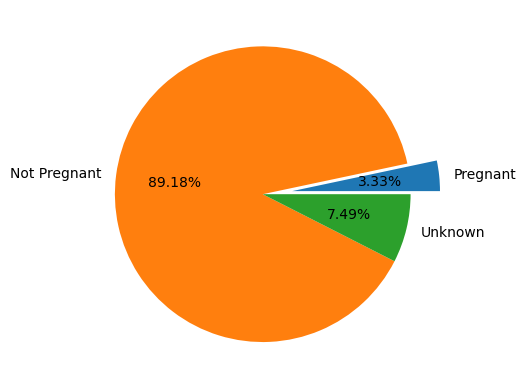

In [79]:
plt.pie(df_p['PREG'].value_counts(normalize=True)[[1,2,-9]],autopct='%1.2f%%',labels=['Pregnant','Not Pregnant','Unknown'],explode=[0.2,0,0])
#plt.legend(loc='upper right')
#plt.xlabel("Gender Class")
plt.savefig("final/pregnant.jpg",dpi=100, bbox_inches='tight')

### Among women, above 3.33% are pregnant. We will first check the treatment efficacy of Pregnant women

In [45]:
df_p2 = df_p.loc[df_p['PREG']==1]


/var/folders/6h/r7pc5_l13x330pg07c8g6v_w0000gn/T/ipykernel_19931/216598558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p2['reason']=df_p2['REASON'].map({1:'Completed',


Text(0, 0.5, '% of Pregnant women')

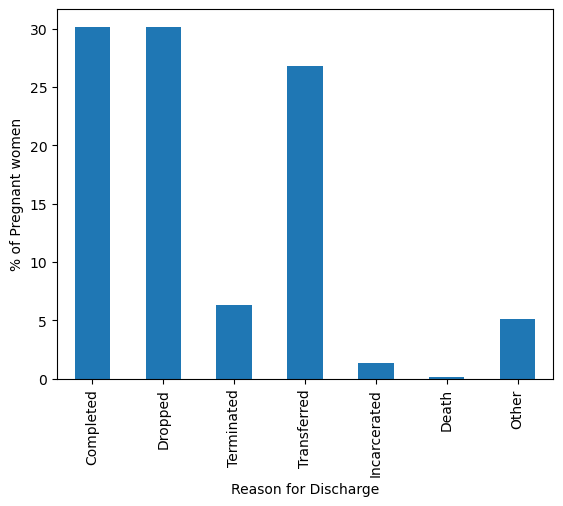

In [70]:
df_p2['reason']=df_p2['REASON'].map({1:'Completed',
                                    2 : 'Dropped', 
                                               3 : 'Terminated',
                                               4 : 'Transferred',
                                               5 : 'Incarcerated',
                                               6 : 'Death', 
                                               7 : 'Other'})
df_p2['reason'].value_counts(normalize=True).mul(100)[['Completed','Dropped','Terminated','Transferred','Incarcerated','Death','Other']].plot(kind='bar')
plt.xlabel("Reason for Discharge")
plt.ylabel("% of Pregnant women")

In [74]:
df_p2c = df_p2.loc[df_p2['REASON']==1]
df_p2c.shape

(13797, 83)

### We can see from the plot that around 30 % of pregnant women completed their treatment. Now we are more interested in the total efficacy after their treatment completion.

In [4]:
## Data of total efficacy after treatment completion

df_c = pd.read_csv('Completed_Treatments_Efficinecy_Data_edited_efficacy_.csv')

In [5]:
df_cw = df_c.loc[df_c['GENDER']==2]
df_cp = df_cw.loc[df_cw['PREG']==1]

In [6]:
## Verifying the shape
df_cp.shape

(9812, 89)

In [7]:
df_cp.head()

,REASON,FRSTUSE2,EMPLOY_D,MARSTAT,PRIMINC,TRNQFLG,NOPRIOR,PREG,METHUSE,FRSTUSE3,DETNLF_D,FREQ2,SUB2,INHFLG,SUB1_D,ALCDRUG,SERVICES,AGE,ETHNIC,SERVICES_D,DETNLF,PRIMPAY,HERFLG,IDU,REGION,LOS,FREQ_ATND_SELF_HELP_D,SEDHPFLG,SUB3,BENZFLG,OPSYNFLG,FREQ3_D,ALCFLG,SUB2_D,OTCFLG,HLTHINS,DIVISION,GENDER,STFIPS,ROUTE3,FRSTUSE1,AMPHFLG,PCPFLG,PSOURCE,COKEFLG,MTHAMFLG,SUB3_D,DAYWAIT,CBSA,PSYPROB,RACE,ROUTE1,DETCRIM,VET,ARRESTS_D,MARFLG,FREQ1_D,STIMFLG,LIVARAG_D,FREQ1,SUB1,DISYR,BARBFLG,EMPLOY,LIVARAG,FREQ2_D,HALLFLG,ROUTE2,ARRESTS,FREQ_ATND_SELF_HELP,EDUC,DSMCRIT,METHFLG,FREQ3,CASEID,OTHERFLG,cbsatitle,metropolitanmicropolitanstatis,countycountyequivalent,statename,fipscountycode,centraloutlyingcounty,efficacy_living_arrangement,efficacy_employment,efficacy_arrests,freq1_efficacy,freq2_efficacy,freq3_efficacy,combining_efficacy
1,1,2,4,2,4,0,1,1,2,-9,5,3,5,0,10,2,6,5,4,6,5,4,1,-9,4,37,4,0,1,0,0,-9,0,5,0,2,9,2,2,-9,3,0,0,7,0,1,1,0,11260,2,5,2,6,2,0,0,1,0,3,3,10,2017,0,4,3,3,0,2,0,1,3,5,0,-9,20171548272,0,"Anchorage, AK",1,"Matanuska-Susitna Borough, Anchorage Municipality",Alaska,"170, 20","Central, Outlying",Not known,Not known,Not known,Improved,Not improved,Not known,Improved
6,1,3,2,2,1,0,1,1,2,3,-9,3,19,0,2,3,7,6,4,7,-9,5,0,0,4,35,1,0,4,0,0,1,1,19,0,3,9,2,2,2,3,0,0,1,0,0,4,0,11260,2,8,1,-9,2,0,1,1,0,3,1,2,2017,0,2,3,-9,0,2,0,1,3,4,0,1,20171681290,1,"Anchorage, AK",1,"Matanuska-Susitna Borough, Anchorage Municipality",Alaska,"170, 20","Central, Outlying",Not known,Not known,Not known,Not improved,Improved,Not improved,Improved
7,1,2,4,1,4,0,1,1,2,-9,5,2,2,0,10,3,5,6,4,5,5,4,0,-9,4,35,4,0,1,0,0,1,1,2,0,2,8,2,32,-9,6,0,0,6,0,1,3,0,39900,1,1,3,-9,2,0,0,1,0,3,2,10,2017,0,4,2,2,0,1,1,2,3,8,0,-9,20171643519,0,"Reno, NV",1,"Storey County, Washoe County",Nevada,"29, 31","Outlying, Central",Not known,Not known,Improved,Improved,Not improved,Not improved,Improved
84,1,1,4,2,3,0,1,1,2,-9,5,3,4,0,2,3,6,7,4,6,-9,4,0,-9,4,35,5,0,1,0,0,-9,1,4,0,2,9,2,2,-9,4,0,0,6,0,0,1,0,11260,2,1,1,-9,2,0,1,3,0,2,3,2,2017,0,3,1,2,0,2,0,2,3,19,0,-9,20171661231,0,"Anchorage, AK",1,"Matanuska-Susitna Borough, Anchorage Municipality",Alaska,"170, 20","Central, Outlying",Improved,Not known,Not known,Not improved,Improved,Not known,Improved
89,1,2,3,1,3,0,1,1,2,5,-9,2,4,0,2,3,6,5,4,6,-9,7,0,0,4,35,5,0,12,0,0,2,1,4,0,3,9,2,2,2,2,0,0,1,0,0,12,0,11260,1,8,1,-9,2,0,1,3,1,3,3,2,2017,0,3,3,2,0,5,0,1,3,4,0,2,20171563349,0,"Anchorage, AK",1,"Matanuska-Susitna Borough, Anchorage Municipality",Alaska,"170, 20","Central, Outlying",Not known,Not known,Not known,Not improved,Not improved,Not improved,Not improved


Text(0, 0.5, '% of Pregnant women')

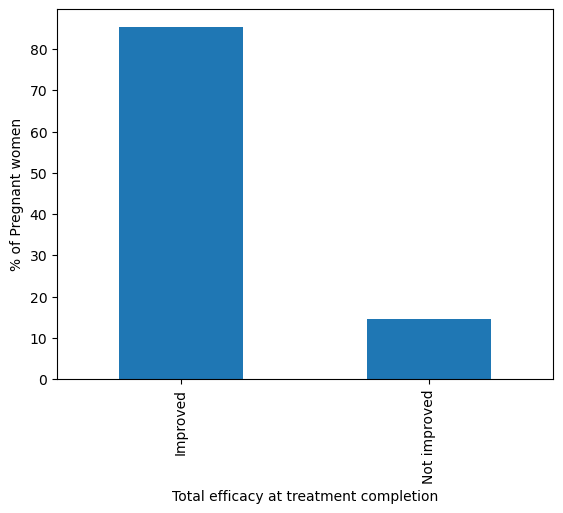

In [77]:
df_cp['combining_efficacy'].value_counts(normalize=True).mul(100).plot(kind='bar')
plt.xlabel("Total efficacy at treatment completion")
plt.ylabel("% of Pregnant women")

([<matplotlib.patches.Wedge at 0x7fd028798e50>,
 [Text(-1.164257400618887, 0.5783638172501393, 'Improved'),
  Text(0.985140854536995, -0.48938481456019833, 'Not improved')],
 [Text(-0.7164660926885458, 0.3559161952308549, '85.32%'),
  Text(0.537349557020179, -0.26693717157828994, '14.68%')])

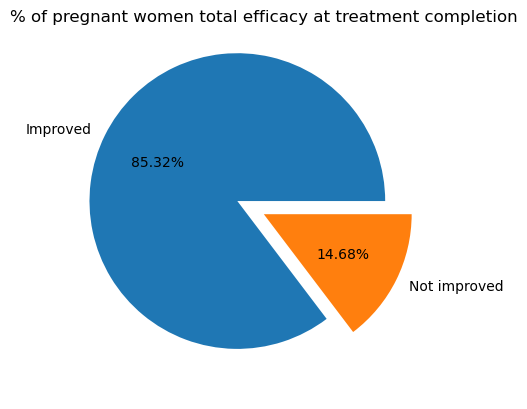

In [80]:
plt.title('% of pregnant women total efficacy at treatment completion')
plt.pie(df_cp['combining_efficacy'].value_counts(normalize=True),labels=['Improved','Not improved'],autopct='%1.2f%%',explode=[0.2,0])
#plt.legend(loc='upper right')
#plt.xlabel("Gender Class")

### From the above plot, we can see that after completion of treatment around 85% of pregnant women's total efficacy is improved but 15% of them are not improved even after completion of treatment. Let's dig deeper to find why?

### After training our model with XGBClassifier for total efficacy, we have chosen 4 parameters from top feature importance obtained from our model.
  ### 1. DAYWAIT
  ### 2. FREQ_ATND_SELF_HELP_D
  ### 3. HLTHINS
  ### 4. PSOURCE
  

### Analysis with DAYWAIT

In [8]:
df_cp['daywait']=df_cp['DAYWAIT'].map({0 : '0 days',
                                                 1 : '1-7 days', 
                                                 2 : '8-14 days',
                                                 3 : '15-30 days',
                                                 4 : '>31 days', 
                                                 -9 : 'Missing'})


df_cp1 = df_cp.loc[df_cp['DAYWAIT']!=-9]
df_cp1['daywait'].value_counts()

/var/folders/6h/r7pc5_l13x330pg07c8g6v_w0000gn/T/ipykernel_22234/334921108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp['daywait']=df_cp['DAYWAIT'].map({0 : '0 days',


0 days        3983
1-7 days      1715
8-14 days      332
15-30 days     283
>31 days       162
Name: daywait, dtype: int64

<AxesSubplot:xlabel='daywait', ylabel='count'>

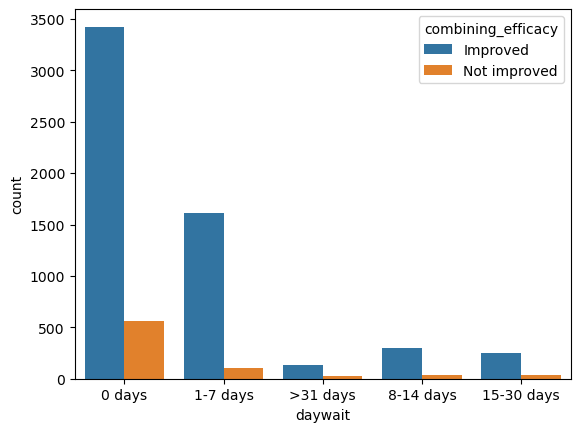

In [107]:
sns.countplot(data=df_cp1, x='daywait', hue='combining_efficacy')

In [23]:
df_cross2 = pd.crosstab(df_cp1['daywait'], df_cp1['combining_efficacy'], normalize='index')
df_cross2

combining_efficacy,Improved,Not improved
daywait,,
0 days,0.859654,0.140346
1-7 days,0.937609,0.062391
15-30 days,0.872792,0.127208
8-14 days,0.885542,0.114458
>31 days,0.814815,0.185185


In [24]:
wait_order = ['0 days','1-7 days','8-14 days','15-30 days','>31 days']
df_cross2 = df_cross2.reindex(wait_order, axis="rows")

In [25]:
df_cross2

combining_efficacy,Improved,Not improved
daywait,,
0 days,0.859654,0.140346
1-7 days,0.937609,0.062391
8-14 days,0.885542,0.114458
15-30 days,0.872792,0.127208
>31 days,0.814815,0.185185


### Patients with co-occuring mental and substance abuse disorder

In [55]:
df_t['PSYPROB'].value_counts(normalize=True)

 2    0.466679
 1    0.384746
-9    0.148575
Name: PSYPROB, dtype: float64

Text(0.5, 1.0, 'Clients having co-occuring mental and substance abuse disorder')

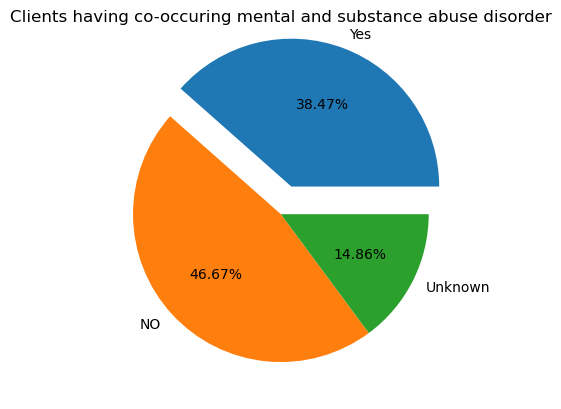

In [58]:
plt.pie(df_t['PSYPROB'].value_counts(normalize=True)[[1,2,-9]],autopct='%1.2f%%',labels=['Yes','NO','Unknown'],explode=[0.2,0,0])
#plt.legend(loc='upper right')
plt.title("Clients having co-occuring mental and substance abuse disorder")

### From the given dataset, we can see that more than 38.47% are having co-occuring mental and substance abuse disorders.

In [64]:
df_m = df_t.loc[df_t['PSYPROB']==1]
df_m['REASON'].value_counts(normalize=True)

1    0.329217
4    0.302397
2    0.250266
3    0.056514
7    0.043953
5    0.015173
6    0.002480
Name: REASON, dtype: float64

/var/folders/6h/r7pc5_l13x330pg07c8g6v_w0000gn/T/ipykernel_22234/2712104897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['reason']=df_m['REASON'].map({1:'Completed',


Text(0, 0.5, '% of clients with PSYPROB')

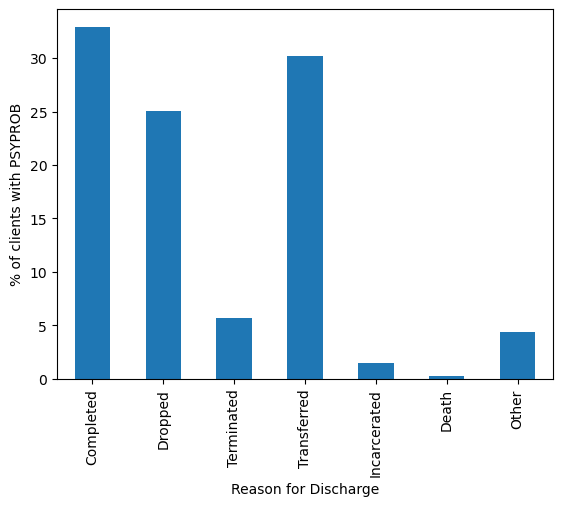

In [61]:
df_m['reason']=df_m['REASON'].map({1:'Completed',
                                    2 : 'Dropped', 
                                               3 : 'Terminated',
                                               4 : 'Transferred',
                                               5 : 'Incarcerated',
                                               6 : 'Death', 
                                               7 : 'Other'})

df_m['reason'].value_counts(normalize=True).mul(100)[['Completed','Dropped','Terminated','Transferred','Incarcerated','Death','Other']].plot(kind='bar')
plt.xlabel("Reason for Discharge")
plt.ylabel("% of clients with PSYPROB")

### Around 33% of patients with co-occuring mental and substance abuse disorder have completed the treatment. Now we want to analyse how many of the clients with PSYPROB obtained Improved total efficacy after completion of treatment.

In [65]:
df_cm = df_c.loc[df_c['PSYPROB']==1]

In [66]:
df_cm['combining_efficacy'].value_counts()

Improved        344699
Not improved     47515
Name: combining_efficacy, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe7e6a36910>,
 [Text(-1.2069792496596548, 0.48290898820690564, 'Improved'),
  Text(1.0212901247630686, -0.4086153216185562, 'Not improved')],
 [Text(-0.7427564613290181, 0.29717476197348036, '87.89%'),
  Text(0.5570673407798555, -0.22288108451921243, '12.11%')])

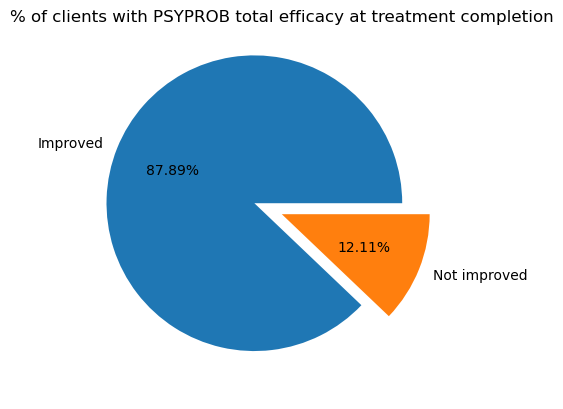

In [67]:
plt.title('% of clients with PSYPROB total efficacy at treatment completion')
plt.pie(df_cm['combining_efficacy'].value_counts(normalize=True),labels=['Improved','Not improved'],autopct='%1.2f%%',explode=[0.2,0])
#plt.legend(loc='upper right')
#plt.xlabel("Gender Class")

### Around 12% of patients with PSYPROB's total efficacy is not improved. We do further analysis on feature importance variables obtained from the XGBclassifier to see patterns.

### Analysis with DAYWAIT

### Analysis of Pregnant women with DAYWAIT using plotly

In [114]:
def plot_hue_plotly(df, hue, Category, Value):
    
    df_grouped = df.groupby([hue,Category])[Value].apply(lambda x: (x == 'Improved').mean())
    #print(df_grouped)

    df_grouped=df_grouped.reset_index()
    
    #wait_order = ['0 days','1-7 days','8-14 days','15-30 days','>31 days']
    #df_grouped = df_grouped[Category].reindex(wait_order, axis="rows")
    
    #print(df_grouped)

    df_grouped=df_grouped.loc[(df_grouped[hue]!='Missing')&(df_grouped[Category]!='Missing')]

    traces = []
    for hue_value in df_grouped[hue].unique():
        filtered_df = df_grouped[df_grouped[hue] == hue_value]
        trace = go.Scatter(
            x=filtered_df[Category],
            y=filtered_df[Value],
            mode='lines',
            name=hue_value
        )
        traces.append(trace)

    # Create the figure
    fig = go.Figure(data=traces)
    fig.update_xaxes(title_text=Category)
    fig.update_yaxes(title_text='Treatment Efficacy')
    fig.update_layout(legend_title=hue)
    fig.update_layout(title='Treatment Efficacy wrt ' + Category+ ' and '+ hue)

    # Show the plot
    fig.show()

In [120]:
## Use this map to keep the order fixed while using groupby
category_order_self_help = {
0 : '0 days',
1 : '1-7 days', 
2 : '8-14 days',
3 : '15-30 days',
4 : '>31 days', 
-9 : 'Missing'
}
df_cw['daywait'] = pd.Categorical(df_cw['DAYWAIT'], categories=category_order_self_help.keys(), 
                                             ordered=True).map(category_order_self_help)

df_cw['preg']=df_cw['PREG'].map({1 : 'Pregnant',2 : 'Not Pregnant', -9 : 'Missing'})

/var/folders/6h/r7pc5_l13x330pg07c8g6v_w0000gn/T/ipykernel_22234/1017002295.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6h/r7pc5_l13x330pg07c8g6v_w0000gn/T/ipykernel_22234/1017002295.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:

plot_hue_plotly(df_cw,'preg','daywait','combining_efficacy')

preg          daywait   
Missing       0 days        0.868966
              1-7 days      0.901685
              8-14 days     0.869565
              15-30 days    0.850877
              >31 days      0.860000
              Missing       0.973275
Not Pregnant  0 days        0.886457
              1-7 days      0.949618
              8-14 days     0.920434
              15-30 days    0.904305
              >31 days      0.860381
              Missing       0.819330
Pregnant      0 days        0.859654
              1-7 days      0.937609
              8-14 days     0.885542
              15-30 days    0.872792
              >31 days      0.814815
              Missing       0.799221
Name: combining_efficacy, dtype: float64
            preg     daywait  combining_efficacy
0        Missing      0 days            0.868966
1        Missing    1-7 days            0.901685
2        Missing   8-14 days            0.869565
3        Missing  15-30 days            0.850877
4        Missing    >31

In [126]:
df_cw['psyprob']=df_cw['PSYPROB'].map({1 : 'YES',2 : 'NO', -9 : 'Missing'})

/var/folders/6h/r7pc5_l13x330pg07c8g6v_w0000gn/T/ipykernel_22234/3850926735.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:

plot_hue_plotly(df_cw,'psyprob','daywait','combining_efficacy')

psyprob  daywait   
Missing  0 days        0.811075
         1-7 days      0.697248
         8-14 days     0.811024
         15-30 days    0.773109
         >31 days      0.753247
         Missing       0.903501
NO       0 days        0.909139
         1-7 days      0.950382
         8-14 days     0.918839
         15-30 days    0.911582
         >31 days      0.887324
         Missing       0.802812
YES      0 days        0.874692
         1-7 days      0.950468
         8-14 days     0.921383
         15-30 days    0.901728
         >31 days      0.843186
         Missing       0.831582
Name: combining_efficacy, dtype: float64
    psyprob     daywait  combining_efficacy
0   Missing      0 days            0.811075
1   Missing    1-7 days            0.697248
2   Missing   8-14 days            0.811024
3   Missing  15-30 days            0.773109
4   Missing    >31 days            0.753247
5   Missing     Missing            0.903501
6        NO      0 days            0.909139
7        NO